In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.manifold import TSNE

In [55]:
import warnings

In [56]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Analyse Train and Test datasets

In [57]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [58]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,"1,961.00",Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,"1,329.00",GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,"1,958.00",Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,"1,997.00",Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00,TA,TA,PConc,TA,TA,No,GLQ,602.00,Unf,0.00,324.00,926.00,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00,0.00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,"1,998.00",Fin,2.00,470.00,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.00,Gd,TA,PConc,Gd,TA,No,ALQ,263.00,Unf,0.00,"1,017.00","1,280.00",GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,"1,992.00",RFn,2.00,506.00,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Analyse Target Variable

In [60]:
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df.SalePrice

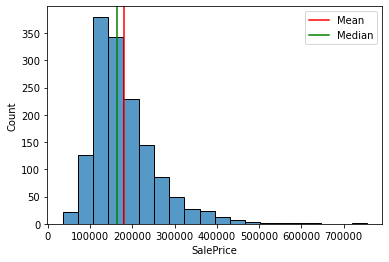

In [61]:
sns.histplot(y, bins=20)
plt.axvline(y.mean(), color='r', linestyle='-');
plt.axvline(y.median(), color='g', linestyle='-');
plt.legend({'Mean': y.mean(), 'Median':y.median()});

In [62]:
y_log = np.log(y)

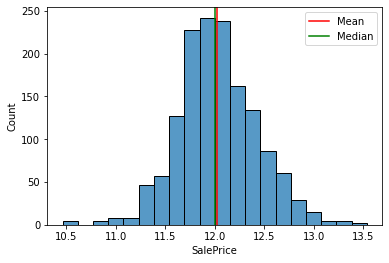

In [63]:
sns.histplot(y_log, bins=20)
mean = y_log.mean()
median = y_log.median()

plt.axvline(mean, color='r', linestyle='-');
plt.axvline(median, color='g', linestyle='-');
plt.legend({'Mean': mean, 'Median': median});

Now we can say that our target variable is normaly distributed

### Analyse Missing Values

In [64]:
def get_missing_values_info(data):
    missing_data = data.isna().sum()
    missing_data = missing_data[missing_data > 0]
    return missing_data

In [65]:
train_data_missing_values = get_missing_values_info(df)
test_data_missing_values = get_missing_values_info(test_df)

In [66]:
print('MISSING VALUES')
print('TRAIN: ', train_data_missing_values.shape[0])
print('TEST: ', test_data_missing_values.shape[0])

MISSING VALUES
TRAIN:  19
TEST:  33


In [67]:
train_data_missing_values

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [68]:
test_data_missing_values

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [69]:
attributes_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [70]:
df = df.drop(attributes_to_drop, axis=1)
test_df = test_df.drop(attributes_to_drop, axis=1)

In [71]:
categorical_data = df.select_dtypes(['object'])
numerical_data = df.select_dtypes(['int64', 'float64'])

In [72]:
get_missing_values_info(numerical_data)

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [73]:
categorical_features_with_missing_values = get_missing_values_info(categorical_data)
categorical_features_with_missing_values

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [74]:
numerical_features = list(numerical_data)
categorical_features = list(categorical_data)

# Numerical Data preprocessing

In [75]:
numerical_data.shape

(1460, 38)

### Filling missing values

In [76]:
imputer = SimpleImputer(strategy='median')
filled_numerical_data = imputer.fit_transform(numerical_data)
filled_numerical_data = pd.DataFrame(filled_numerical_data, columns=numerical_features)

### Backward elimination. Feature selection strategy

In [77]:
def backward_elimination(X, y, significance_level):
    X_selected = X.copy()
    columns = list(X)
    attributes_number = len(columns)
    
    for i in range(0, attributes_number):
        regressor_OLS = sm.OLS(y, X_selected).fit()
        
        maxValue = max(regressor_OLS.pvalues)
        if maxValue > significance_level:
            
            for j in range(0, attributes_number - i):
                
                if (regressor_OLS.pvalues[j] == maxValue):
                    X_selected = X_selected.drop(X_selected.columns[j], axis=1)
                    columns = np.delete(columns, j)
    
    regressor_OLS.summary()
    return X_selected, columns

In [78]:
selected_numerical_data, selected_columns = backward_elimination(filled_numerical_data, y_log, significance_level=0.05)

In [79]:
selected_columns.shape

(22,)

### Setting up a numerical pipeline 

In [80]:
numerical_pipeline = Pipeline([
    ('missing_values', SimpleImputer(strategy='median')),
    ('standardization', StandardScaler())
])

In [81]:
numerical_pipeline.fit_transform(numerical_data)[0].shape

(38,)

In [82]:
selected_columns[:10]

array(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath'], dtype='<U13')

In [83]:
processed_numerical_data = pd.DataFrame(numerical_pipeline.fit_transform(numerical_data), columns=numerical_features)

In [84]:
processed_numerical_data = processed_numerical_data[selected_columns]

# Categorical Data preprocessing

In [85]:
categorical_features_with_missing_values

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

The plan is to make a classifier to predict missing values of FireplaceQu. In others just impute the most frequent value.

### Predicting FireplaceQu

In [86]:
clf_target = categorical_data.FireplaceQu
indeces_for_train_data = ~clf_target.isna()

In [87]:
clf_target = clf_target[indeces_for_train_data]
clf_train = processed_numerical_data[indeces_for_train_data]

### T-SNE analysis

In [88]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(processed_numerical_data)

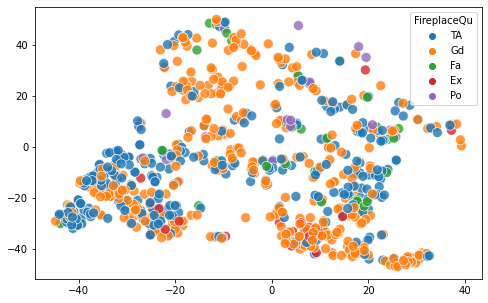

In [89]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=tsne_repr[:, 0], y=tsne_repr[:, 1], alpha=0.8, s=100, hue=categorical_data.FireplaceQu);

The plot above shows that our FireplaceQu doesn't have any clusters. Most likely it will be hard to distiguish or classify this data

**1. I'm going to use a KNN classifier and GridSearchCV for tuning parameters.**

- weights {'uniform', 'distance'}
- n_neighbors { 3, 5, 8}
- algorithm {'auto', 'ball_tree', 'kd_tree', 'brute'}

In [90]:
params = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': list(range(5, 30, 5)),
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

In [91]:
grid_search = GridSearchCV(KNeighborsClassifier(), params, scoring='accuracy', cv=10)

In [92]:
print(clf_target.shape)
print(clf_train.shape)

(770,)
(770, 22)


In [93]:
clf_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,EnclosedPorch,ScreenPorch,PoolArea,YrSold,SalePrice
1,-0.09,-0.07,2.18,0.16,-0.43,-0.57,0.47,-0.80,-0.48,-0.82,0.79,-0.76,0.16,0.60,-0.11,0.31,1.63,-0.36,-0.27,-0.07,-0.61,0.01
2,0.07,0.65,-0.52,0.98,0.83,0.33,-0.31,1.19,0.52,1.11,0.79,1.23,0.16,0.60,0.93,0.31,-0.75,-0.36,-0.27,-0.07,0.14,0.54
3,-0.10,0.65,-0.52,-1.86,-0.72,-0.57,-0.69,0.94,0.38,1.11,-1.03,-0.76,0.16,0.60,0.81,1.65,-0.75,4.09,-0.27,-0.07,-1.37,-0.52
4,0.38,1.37,-0.52,0.95,0.73,1.37,0.20,1.62,1.30,1.11,0.79,1.23,1.39,0.60,0.89,1.65,0.78,-0.36,-0.27,-0.07,0.14,0.87
6,-0.04,1.37,-0.52,1.08,0.98,0.46,1.43,-0.80,0.34,1.11,0.79,-0.76,0.16,0.60,1.06,0.31,1.28,-0.36,-0.27,-0.07,-0.61,1.59


In [94]:
clf_target.head()

1    TA
2    TA
3    Gd
4    TA
6    Gd
Name: FireplaceQu, dtype: object

In [95]:
clf_target.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

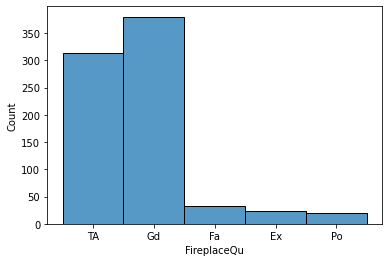

In [96]:
sns.histplot(clf_target);

The feature looks pretty unbalanced, but as far as I'm concerned knn can't be influenced by unbalanced data

In [97]:
grid_search.fit(clf_train, clf_target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15, 20, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [98]:
grid_search.best_score_

0.6311688311688312

In [99]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 20, 'weights': 'uniform'}

**2. RandomForestClassifier**

Lets try randomforest with balanced classes

In [100]:
params = {'max_depth': range(5, 30, 5), 'class_weight': ['balanced']}

In [105]:
grid_search = GridSearchCV(RandomForestClassifier(), params, scoring='accuracy', cv=10)

In [ ]:
grid_search.fit(clf_train, clf_target)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_